# jitcsim tutorial
### DDE

Simulation of the Kuramoto model with delay.
The control parameter of the model is coupling.
The output is plotting the Kuramoto order parameter vs time.


Reference:
- Yeung, M.S. and Strogatz, S.H., 1999. Time delay in the Kuramoto model of coupled oscillators. Physical Review Letters, 82(3), p.648. Figure 3.

In [1]:
import numpy as np
from numpy import pi
import networkx as nx
from numpy.random import uniform, normal
from jitcsim.visualization import plot_order
from jitcsim.models.kuramoto_dde import Kuramoto_II

In [2]:
np.random.seed(2)

N = 12
alpha0 = 0.0
sigma0 = 0.05
coupling0 = 1.5 / (N - 1)
omega0 = [0.5*pi] * N  # normal(0, 0.1, N)
initial_state = uniform(-pi, pi, N)
adj = nx.to_numpy_array(nx.complete_graph(N), dtype=int)
delays = adj * 2.0

parameters = {
    'N': N,                             # number of nodes
    'adj': adj,                         # adjacency matrix
    'delays': delays,                   # matrix of delays
    't_initial': 0.,                    # initial time of integration
    "t_final": 100,                     # final time of integration
    't_transition': 0.0,                # transition time
    "interval": 0.2,                    # time interval for sampling

    "alpha": alpha0,                    # frustration
    "omega": omega0,                    # initial angular frequencies
    'initial_state': initial_state,     # initial phase of oscillators

    'control': ['coupling'],            # control parameters

    "use_omp": False,                   # use OpenMP
    "output": "data",                   # output directory
}

In [3]:
# make an instance of the model
sol = Kuramoto_II(parameters)
# compile the model
sol.compile()


/home/ziaee/.local/lib/python3.8/site-packages/jitcdde/_jitcdde.py:794: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `False` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `False` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")


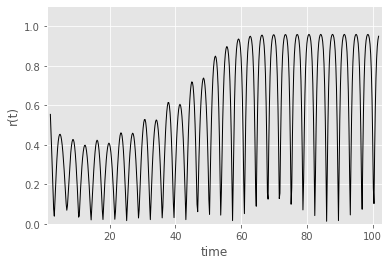

In [4]:
# run the simulation by setting the control parameters
controls = [coupling0]
data = sol.simulate(controls, disc="blind", rtol=0, atol=1e-5)
x = data['x']
t = data['t']

# calculate the Kuramoto order parameter
order = sol.order_parameter(x)

# plot order parameter vs time
plot_order(t,
           order,
           filename="data/01_sde.png",
           xlabel="time",
           ylabel="r(t)",
           close_fig=False)
